Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age 
Step 8. For each occupation present the percentage of women and men

In [169]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called users
# Step 4. Discover what is the mean age per occupation

import pandas as pd   
url1 = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'  #Import the dataset.
users = pd.read_csv(url1, sep= '|')    
users.groupby('occupation')['age'].mean()   

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [170]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least


maleRatio = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
total = maleRatio[['F', 'M']].sum(axis=1)
maleRatio['MaleRatio'] = 100 * maleRatio['M'] / total
maleRatio = maleRatio['MaleRatio'].sort_values(ascending=False) #sort
maleRatio

occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: MaleRatio, dtype: float64

In [171]:
# Step 6. For each occupation, calculate the minimum and maximum ages

users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [172]:
# Step 7. For each combination of occupation and sex, calculate the mean age 

users.groupby(['occupation', 'gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [173]:
# Step 8. For each occupation present the percentage of women and men

gen_occ = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occ_count = users.groupby(['occupation']).agg('count')
gen_perc = gen_occ.div(occ_count, level = "occupation") * 100
gen_perc.loc[:,'gender'] 

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [174]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12

import pandas as pd
url2 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url2)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [175]:
# Step 4. Select only the Goal column

euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [176]:
# Step 5. How many team participated in the Euro2012?

euro12['Team'].count()

16

In [177]:
# Step 6. What is the number of columns in the dataset?

print(len(euro12.columns))

35


In [178]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [179]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [180]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_ycards = euro12.groupby(['Team'])['Yellow Cards'].mean()
mean_ycards

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [181]:
# Step 10. Filter teams that scored more than 6 goalsStep

euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [182]:
#  11. Select the teams that start with G

euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [183]:
# Step 12. Select the first 7 columns

euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [184]:
# Step 13. Select all columns except the last 3

euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [185]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

accuracy = euro[euro.Team.isin(['England','Italy','Russia'])]
accuracy[['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [186]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s1

0     1
1     4
2     1
3     4
4     4
     ..
95    2
96    4
97    3
98    4
99    2
Length: 100, dtype: int64

In [187]:
# The second a random number from 1 to 3
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s2


0     3
1     1
2     3
3     3
4     2
     ..
95    2
96    2
97    2
98    3
99    2
Length: 100, dtype: int64

In [188]:
# The third a random number from 10,000 to 30,000
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
s3

0     25669
1     19491
2     13786
3     19810
4     27367
      ...  
95    19145
96    28265
97    27289
98    20631
99    25632
Length: 100, dtype: int64

In [189]:
# Step 3. Create a DataFrame by joinning the Series by column
join = pd.DataFrame({'series1':s1,'series2':s2,'series3':s3})
join

,series1,series2,series3
0,1,3,25669
1,4,1,19491
2,1,3,13786
3,4,3,19810
4,4,2,27367
...,...,...,...
95,2,2,19145
96,4,2,28265
97,3,2,27289
98,4,3,20631


In [190]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
rename = join.rename(columns = {'series1':'bedrs','series2':'bathrs','series3':'price_sqr_meter'})
rename

,bedrs,bathrs,price_sqr_meter
0,1,3,25669
1,4,1,19491
2,1,3,13786
3,4,3,19810
4,4,2,27367
...,...,...,...
95,2,2,19145
96,4,2,28265
97,3,2,27289
98,4,3,20631


In [191]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# bigcolumn = rename['bedrs'].append(rename['bathrs'].append(rename['price_sqr_meter']))
columns=['bedrs','bathrs','price_sqr_meter']
bigcolumn = pd.concat([rename[col] for col in columns], ignore_index=True)
bigcolumn

0          1
1          4
2          1
3          4
4          4
       ...  
295    19145
296    28265
297    27289
298    20631
299    25632
Length: 300, dtype: int64

<!-- Step 6: Ops it seems it is going only until index 99. Is it true? -->

it only went up to 99 when using append 
but when using concat it went to 299

In [192]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True)

0          1
1          4
2          1
3          4
4          4
       ...  
295    19145
296    28265
297    27289
298    20631
299    25632
Length: 300, dtype: int64

Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71


The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [193]:
# Step 1: Import the necessary libraries
# Step 2: Import the dataset from this address
# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

import numpy as np
import pandas as pd

data = pd.read_csv('wind.txt',delim_whitespace=True)
data = pd.read_csv ('wind.txt', sep = '\s+')
data.rename(columns = {'Yr':'year', 'Mo':'month', 'Dy':'day'},inplace =True)
data

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [194]:
# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fixYear():
    data['year'] += 1900 #

fixYear() 

data

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [195]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(pd.concat([data['year'], data['month'], data['day']], axis=1))
data.drop(['year','month','day'], axis=1, inplace=True)
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', length=6574, freq=None)

In [196]:
# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [197]:
data = data.dropna()
data.isnull().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [198]:
# Step 7. Compute how many non-missing values there are in total.
data.count()

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

In [199]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

data.mean().mean()

10.222465245951726

In [200]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.

loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1) 
loc_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace=True) 
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [201]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

day_stats = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1)
day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)
day_stats

,Min,Max,Mean,Std
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [202]:
# Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.

jan = data[data.index.month == 1].mean()
jan

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [203]:
# Step 12. Downsample the record to a yearly frequency for each location.

yearly = data.resample('M').sum()
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,377.16,291.86,336.97,177.84,273.24,212.53,270.48,225.44,216.41,246.75,345.02,372.88
1961-02-28,426.45,390.97,376.22,240.31,358.23,283.00,308.57,305.40,305.46,328.29,472.29,397.82
1961-03-31,287.82,299.63,281.34,191.72,277.17,231.66,245.93,251.89,272.70,296.72,433.79,416.31
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,280.69,237.88,295.10,167.79,265.45,185.75,214.08,229.79,227.38,238.97,333.54,333.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65
1978-11-30,484.55,444.08,405.24,219.52,344.25,262.29,344.77,289.72,321.04,320.28,522.14,621.69


In [204]:
# Step 13. Downsample the record to a monthly frequency for each location.

monthly = data.resample('M').sum()
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,377.16,291.86,336.97,177.84,273.24,212.53,270.48,225.44,216.41,246.75,345.02,372.88
1961-02-28,426.45,390.97,376.22,240.31,358.23,283.00,308.57,305.40,305.46,328.29,472.29,397.82
1961-03-31,287.82,299.63,281.34,191.72,277.17,231.66,245.93,251.89,272.70,296.72,433.79,416.31
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,280.69,237.88,295.10,167.79,265.45,185.75,214.08,229.79,227.38,238.97,333.54,333.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,299.00,256.04,280.00,139.59,228.41,183.99,175.16,167.95,224.48,171.64,324.47,373.68
1978-09-30,327.41,326.85,319.05,171.75,311.16,278.35,323.71,287.49,302.08,268.17,470.41,581.74
1978-10-31,306.83,268.80,288.17,146.36,264.28,210.00,251.58,227.47,257.23,255.56,427.08,531.65
1978-11-30,484.55,444.08,405.24,219.52,344.25,262.29,344.77,289.72,321.04,320.28,522.14,621.69


In [205]:
# Step 14. Downsample the record to a weekly frequency for each location.

weekly = data.resample('W').sum()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,61.58,52.04,50.25,28.29,42.53,31.21,54.68,29.66,40.75,42.14,57.08,66.13
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,72.60,57.00,70.09,25.76,53.80,41.63,46.97,43.75,35.35,40.16,59.96,62.08
1961-01-29,119.28,89.08,105.29,71.50,97.95,84.10,86.70,85.87,79.90,89.53,118.80,134.33
1961-02-05,117.79,108.22,88.33,57.73,93.53,63.75,85.43,59.84,68.75,66.22,98.09,83.55
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,104.54,78.63,97.59,38.96,71.51,60.33,67.50,53.80,63.08,66.83,82.85,131.10
1978-12-10,145.18,134.33,119.24,68.44,107.01,89.42,101.06,87.42,97.09,98.58,129.62,161.43
1978-12-17,117.31,102.85,104.91,48.42,79.78,50.91,71.46,55.77,64.18,59.96,77.72,108.94
1978-12-24,78.09,56.06,92.21,28.03,54.78,44.03,54.59,60.67,50.06,56.51,82.92,132.84


In [206]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
# mean

maxi = data.resample('W').max()
maxi=maxi[:52]
maxi

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,13.50,14.29,11.75,6.67,12.29,8.33,14.29,9.29,10.92,10.46,16.62,16.46
1961-01-15,19.75,12.08,19.50,10.54,10.37,9.46,15.54,11.50,10.37,14.58,20.71,16.92
1961-01-22,17.75,14.37,17.33,10.13,13.96,13.37,13.42,11.04,8.71,11.38,15.92,16.08
1961-01-29,25.04,20.79,25.84,16.21,21.46,18.58,20.38,19.38,18.66,19.08,26.08,27.63
1961-02-05,24.21,24.21,19.70,11.96,17.37,12.04,14.88,15.54,13.37,13.13,19.33,19.25
1961-02-12,24.54,21.42,21.34,15.37,25.33,17.62,19.17,18.79,18.96,17.79,26.38,21.84
1961-02-19,22.50,20.17,19.41,15.34,16.13,15.12,16.08,14.29,14.88,16.58,28.62,22.58
1961-02-26,25.80,21.50,22.42,15.21,23.09,16.88,21.17,17.25,18.46,20.04,23.21,23.87
1961-03-05,13.33,17.00,13.67,10.04,15.46,11.17,12.75,12.83,11.71,14.09,23.45,17.54
1961-03-12,14.79,16.96,15.50,9.46,14.17,12.67,10.34,15.67,12.46,13.54,22.71,18.16


In [207]:
#minimum
mini=data.resample('W').min()
mini=mini[:52]
mini

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,10.58,6.63,7.62,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-15,9.04,3.54,7.08,0.67,2.29,0.96,2.50,0.58,0.50,2.67,5.25,5.17
1961-01-22,4.92,3.42,7.29,1.04,3.67,3.17,3.17,2.79,1.92,2.71,6.50,6.79
1961-01-29,13.62,9.96,12.67,6.04,10.00,9.42,9.25,8.71,7.12,11.04,14.04,17.50
1961-02-05,10.58,9.46,9.04,5.09,9.87,5.83,8.50,3.63,6.34,5.50,9.17,7.17
1961-02-12,16.00,11.54,13.67,8.38,8.12,8.08,11.08,9.71,10.37,12.25,15.21,17.04
1961-02-19,6.04,11.63,6.13,4.21,9.87,6.92,3.42,7.41,8.17,9.21,14.09,10.96
1961-02-26,7.79,7.08,6.08,2.21,5.96,4.33,3.75,4.67,4.50,7.00,9.59,6.67
1961-03-05,10.96,8.83,8.17,5.88,8.25,6.00,5.50,5.66,6.25,9.79,11.58,8.83
1961-03-12,4.88,8.08,7.54,3.13,5.41,4.08,1.71,5.29,5.21,5.09,10.21,5.54


In [208]:
#mean
mean=data.resample('W').mean()
mean=mean[:52]
mean

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
1961-02-12,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
1961-02-19,14.956667,15.008333,13.813333,10.083333,13.395000,12.020000,9.530000,12.178333,12.508333,13.521667,19.756667,15.925000
1961-02-26,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857
1961-03-05,11.824000,12.956000,10.918000,7.900000,11.758000,8.768000,9.326000,10.032000,9.668000,12.068000,17.174000,14.108000
1961-03-12,9.376667,11.195000,9.923333,6.618333,10.276667,8.791667,5.175000,8.960000,8.818333,9.570000,16.068333,13.066667


In [209]:
#std
std=data.resample('W').std()
std=std[:52]
std

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-08,1.421418,3.282076,1.656985,0.865893,3.390462,2.432523,2.276221,2.912794,1.971712,1.959418,4.531918,2.134978
1961-01-15,3.555392,3.148945,5.034959,3.549559,3.471726,3.251039,4.709309,3.936894,3.500975,4.084293,5.552215,4.692355
1961-01-22,4.893064,4.070420,4.101421,3.466079,3.612875,3.519326,3.857488,3.025765,2.765440,3.203652,3.941358,3.407132
1961-01-29,4.619061,4.242125,4.719091,4.096436,4.244035,3.366385,3.823543,4.191761,4.179486,3.494638,4.675044,4.224639
1961-02-05,5.251408,5.187395,3.975166,2.709106,2.334619,2.397066,2.423454,4.081158,2.802490,2.839501,4.210858,4.336104
1961-02-12,3.587677,3.608373,3.290303,2.262056,5.571108,3.048976,2.974059,3.022753,2.914760,1.746749,4.063753,1.828705
1961-02-19,5.525210,3.908818,4.596928,4.311569,2.542941,3.283510,5.431781,2.497226,2.778528,2.772287,5.021524,4.763632
1961-02-26,7.020716,5.147348,5.578470,4.482075,6.480712,5.029874,6.037916,4.869668,4.705163,4.920064,5.091162,6.182283
1961-03-05,1.071742,3.490319,1.969142,1.815585,2.752539,1.845974,3.253603,2.640733,2.162908,1.729775,5.058249,3.350772
1961-03-12,3.732263,3.359302,2.888631,2.431686,2.813686,3.181839,3.511933,3.621955,2.546428,3.065864,4.408144,4.956336


Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [210]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
# Step 4. See the first 10 entries

import numpy as np
import pandas as pd
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [211]:
# Step 5. What is the number of observations in the dataset?

chipo.shape[0]

4622

In [212]:
# Step 6. What is the number of columns in the dataset?

chipo.shape[1]

5

In [213]:
# Step 7. Print the name of all the columns.

list(chipo)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [214]:
# Step 8. How is the dataset indexed?

chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [215]:
# Step 9. Which was the most-ordered item?

chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [216]:
# Step 10. For the most-ordered item, how many items were ordered?

chipo['item_name'].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [217]:
# Step 11. What was the most ordered item in the choice_description column?

chipo['choice_description'].value_counts()[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [218]:
# Step 12. How many items were orderd in total?

chipo['quantity'].sum()

4972

In [219]:
# Step 13.
# Turn the item price into a float
# Check the item price type
# Create a lambda function and change the type of item price
# Check the item price type

copy = chipo.copy()
copy['item_price'] = copy['item_price'].str[1:]
copy.astype({'item_price':'float64'}).dtypes
copy.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [220]:
copy['item_price'] = copy['item_price'].apply(lambda x: float(x[1:]))
copy.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [244]:
# Step 14. How much was the revenue for the period in the dataset?

revenue = (copy.quantity * copy.item_price).sum()
revenue

5105.02

In [238]:
# Step 15. How many orders were made in the period?

orders = chipo.order_id.value_counts().count() 
orders

1834

In [246]:
# Step 16. What is the average revenue amount per order?

avg=revenue/orders
avg

2.7835441657579065

In [247]:
# Step 17. How many different items are sold?

len(chipo['item_name'].value_counts())

50

Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

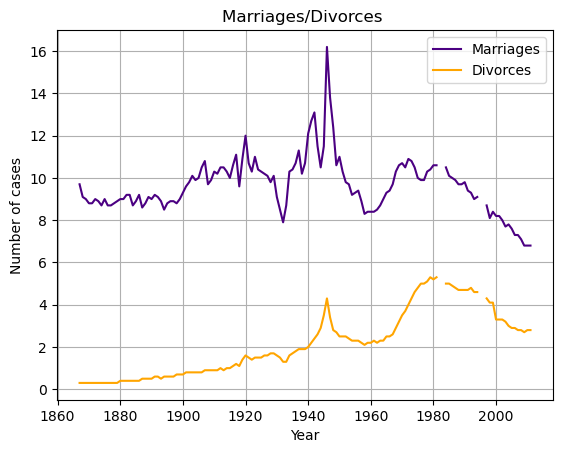

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

divo = pd.read_csv('us-marriages-divorces-1867-2014.csv')

plt.plot(divo['Year'], divo['Marriages_per_1000'], color='indigo', label='Marriages')
plt.plot(divo['Year'], divo['Divorces_per_1000'], color='orange', label='Divorces')
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.title('Marriages/Divorces ')
plt.grid(True)
plt.legend()

Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0.5, 1.0, 'US Marriages VS Divorces')

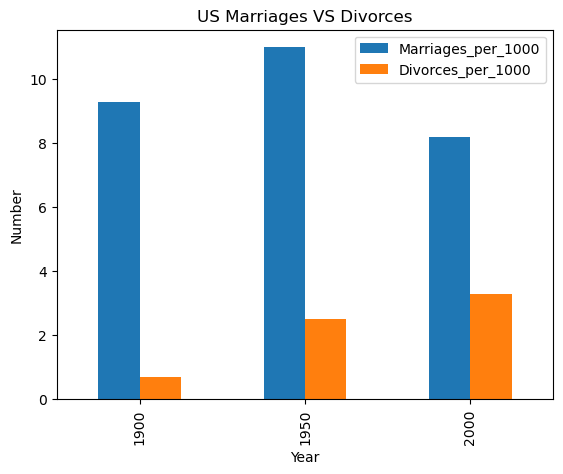

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

divo = pd.read_csv('us-marriages-divorces-1867-2014.csv')
divo = divo[(divo.Year == 1900) | (divo.Year == 1950) | (divo.Year == 2000)]
divo = divo.drop(columns = ['Marriages', 'Divorces', 'Population'])
divo = divo.set_index('Year')
divo.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('US Marriages VS Divorces')

Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

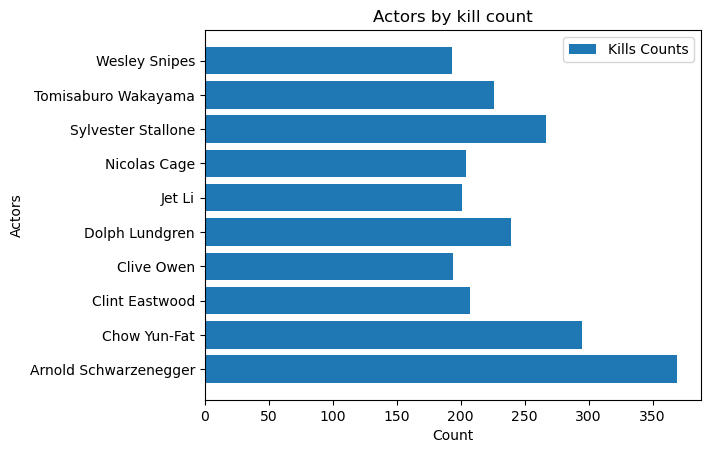

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

actor_kills = pd.read_csv('actor_kill_counts.csv')

plt.barh(actor_kills['Actor'], actor_kills['Count'], label='Kills Counts')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.title('Actors by kill count')
plt.legend()
plt.show()

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

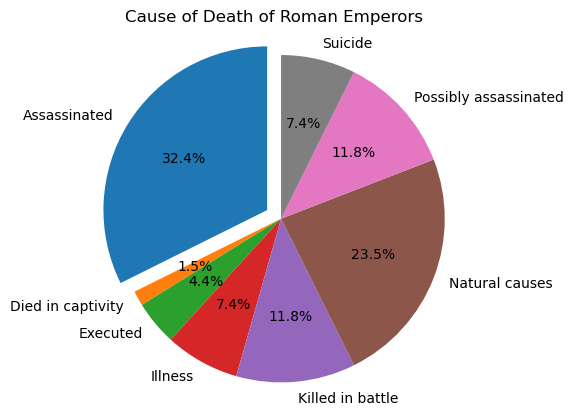

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

re = pd.read_csv('roman-emperor-reigns.csv')
causeOfDeath = re.groupby('Cause_of_Death').count()[['Emperor']]
cause = pd.Series(causeOfDeath.index)
explode = (0.1,0,0,0,0,0,0,0)
fig2, ax2 = plt.subplots()
ax2.pie(emperor, explode=explode, labels=cause,autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')
plt.title('Cause of Death of Roman Emperors')
plt.show()

Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

Text(0.5, 1.0, 'Total revenue VS Number of PhDs awarded in the U.S.')

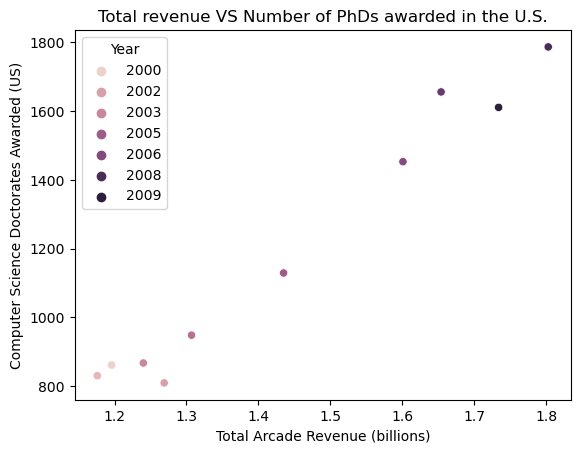

In [252]:
import pandas as pd
import seaborn as sb

revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

axis = sb.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue="Year", data=revenue)
axis.set_title('Total revenue VS Number of PhDs awarded in the U.S.')